In [1]:
import pandas as pd
import numpy as np
from itertools import chain
import patsy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import display
pd.set_option('display.max_rows', 1000)

In [3]:
top80 = pd.read_table("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/newcode/top80pct.tsv")

In [4]:
factordict = top80.groupby('factor')["item"].apply(lambda x: x.tolist()).to_dict()

In [5]:
orderedcats=["Adipose","Blood/Immune","Cardiovascular","CNS","Digestive","Liver","Musculoskeletal/Connective","Pancreas","Other"]

In [6]:
mycolors=["red","orange","yellow","green","blue","purple","pink","cyan","grey"]

In [7]:
categories = pd.read_table("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/wls_gwas/FINAL/outputs/preprocessed/chromatinnew/chromatin_categories.txt")

In [8]:
categories["names"] = categories.apply(lambda x: x.tissue+"__"+x.mark,axis=1)

In [9]:
categorydict = dict(zip(categories.names,categories.category))

In [10]:
categories = categories.set_index("names")

In [11]:
categorysort = dict(zip(orderedcats,range(9)))

In [12]:
usefac = ["f24","f3","f19","f22","f5","f16","f31","f15","f2","f13","f9","f30","f27","f34","f29","f11","f20","f35","f14","f26","f28","f18","f6","f23","f10","f21","f12","f7"]

In [13]:
import math

In [14]:
bonf = -np.log10(0.05/(28*9))

In [15]:
bonf

3.7024305364455254

In [16]:
from statsmodels.stats.multitest import fdrcorrection

In [17]:
pvals_group = []
for factor in usefac:
    temp = pd.read_table("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/wls_gwas/FINAL/outputs/preprocessed/h2_"+factor+"_chromatingroups.cell_type_results.txt")
    print(factor)
    display(temp)
    pvals_group.extend(temp.Coefficient_P_value.values)
rejected, qvalue = fdrcorrection(pvals_group)
fdr = -1 * np.log10(np.max([b for a, b in zip(rejected, pvals_group) if a]))

f24


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Other,1.663082e-08,1.256980e-08,0.092905
1,Musculoskeletal/Connective,1.693897e-08,1.314646e-08,0.098789
2,Adipose,1.530622e-08,1.624488e-08,0.173041
3,CNS,1.037788e-08,1.191237e-08,0.191827
4,Blood/Immune,1.490929e-10,1.111836e-08,0.494650
5,Digestive,7.883255e-11,1.450695e-08,0.497832
6,Liver,-3.070574e-09,1.323980e-08,0.591700
7,Cardiovascular,-1.477299e-08,1.517155e-08,0.834905
8,Pancreas,-1.785760e-08,1.806284e-08,0.838580


f3


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,4.530110e-08,7.937923e-09,5.751901e-09
1,Cardiovascular,3.613898e-09,9.778705e-09,3.558521e-01
2,Liver,-7.764163e-10,8.814589e-09,5.350947e-01
3,Adipose,-3.655810e-09,1.151936e-08,6.245156e-01
4,Musculoskeletal/Connective,-4.710981e-09,8.897279e-09,7.017657e-01
5,Blood/Immune,-7.135938e-09,7.158725e-09,8.405733e-01
6,Other,-1.013568e-08,8.481201e-09,8.839712e-01
7,Pancreas,-2.238581e-08,1.211433e-08,9.676900e-01
8,Digestive,-1.772326e-08,9.154954e-09,9.735613e-01


f19


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Adipose,1.348330e-07,4.799404e-08,0.002482
1,Musculoskeletal/Connective,6.916070e-08,2.964202e-08,0.009819
2,Other,5.150512e-08,2.506634e-08,0.019951
3,Digestive,3.087176e-08,2.201817e-08,0.080442
4,Liver,4.297555e-08,3.774500e-08,0.127440
5,Cardiovascular,3.249218e-08,3.032294e-08,0.141964
6,CNS,-2.488762e-08,2.714847e-08,0.820356
7,Pancreas,-5.053532e-08,3.220085e-08,0.941720
8,Blood/Immune,-4.260721e-08,2.136539e-08,0.976936


f22


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,3.117513e-08,9.076904e-09,0.000297
1,Digestive,9.750102e-09,1.009261e-08,0.167006
2,Pancreas,4.740902e-09,1.385449e-08,0.366103
3,Blood/Immune,-5.875114e-10,7.654472e-09,0.530590
4,Other,-8.875954e-09,1.048848e-08,0.801295
5,Liver,-1.218771e-08,1.105374e-08,0.864897
6,Cardiovascular,-1.286149e-08,8.990755e-09,0.923717
7,Adipose,-1.791265e-08,1.036294e-08,0.958053
8,Musculoskeletal/Connective,-2.192154e-08,8.616310e-09,0.994523


f5


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,4.111921e-08,1.077886e-08,0.000068
1,Pancreas,4.322241e-08,2.102379e-08,0.019897
2,Blood/Immune,1.587118e-08,9.611614e-09,0.049344
3,Liver,-6.301864e-09,1.179964e-08,0.703354
4,Cardiovascular,-1.645541e-08,1.413150e-08,0.877879
5,Other,-1.557600e-08,1.288584e-08,0.886624
6,Adipose,-2.918429e-08,1.453892e-08,0.977642
7,Musculoskeletal/Connective,-2.406593e-08,1.158150e-08,0.981144
8,Digestive,-3.173431e-08,1.282602e-08,0.993324


f16


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Adipose,2.903099e-08,9.833191e-09,0.001577
1,Other,7.926849e-09,3.840161e-09,0.019500
2,Liver,1.551623e-08,9.412173e-09,0.049622
3,Musculoskeletal/Connective,4.040579e-09,3.721573e-09,0.138802
4,Cardiovascular,9.042841e-09,8.693055e-09,0.149115
5,Digestive,2.447337e-09,5.833031e-09,0.337402
6,Blood/Immune,-2.981542e-09,4.011454e-09,0.771337
7,Pancreas,-1.101308e-08,7.014276e-09,0.941804
8,CNS,-1.020050e-08,5.149786e-09,0.976191


f31


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Musculoskeletal/Connective,3.898284e-09,2.831017e-09,0.084258
1,CNS,3.254858e-09,2.632176e-09,0.108124
2,Cardiovascular,2.721071e-09,2.970612e-09,0.179834
3,Blood/Immune,-1.746892e-09,2.212823e-09,0.785073
4,Pancreas,-3.213506e-09,3.989140e-09,0.789753
5,Digestive,-2.576965e-09,2.970470e-09,0.807174
6,Adipose,-5.578991e-09,3.510243e-09,0.944009
7,Other,-7.335859e-09,2.776642e-09,0.995879
8,Liver,-7.191464e-09,2.605247e-09,0.997113


f15


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,1.068622e-08,3.120600e-09,0.000308
1,Blood/Immune,5.969682e-10,2.727107e-09,0.413363
2,Adipose,-3.186261e-09,4.333707e-09,0.768900
3,Cardiovascular,-3.105201e-09,4.006178e-09,0.780861
4,Digestive,-4.046480e-09,3.263407e-09,0.892504
5,Liver,-4.039232e-09,3.221864e-09,0.895023
6,Pancreas,-7.958083e-09,5.111960e-09,0.940236
7,Other,-6.611065e-09,3.652559e-09,0.964851
8,Musculoskeletal/Connective,-6.492099e-09,3.176954e-09,0.979498


f2


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,4.560858e-08,8.764559e-09,9.765258e-08
1,Pancreas,4.364302e-08,1.448927e-08,1.297272e-03
2,Musculoskeletal/Connective,-3.876226e-09,8.813171e-09,6.699670e-01
3,Liver,-5.952635e-09,1.012003e-08,7.218022e-01
4,Cardiovascular,-8.614295e-09,1.000393e-08,8.054059e-01
5,Adipose,-1.179038e-08,1.094801e-08,8.592471e-01
6,Blood/Immune,-8.391671e-09,6.968687e-09,8.857433e-01
7,Other,-1.835881e-08,9.814895e-09,9.692931e-01
8,Digestive,-2.369288e-08,1.012702e-08,9.903470e-01


f13


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,1.378596e-08,2.453808e-09,9.648405e-09
1,Liver,1.354982e-09,2.789547e-09,3.135774e-01
2,Pancreas,2.047823e-09,4.930314e-09,3.389416e-01
3,Blood/Immune,4.517085e-10,2.373946e-09,4.245458e-01
4,Cardiovascular,-1.948801e-09,3.025133e-09,7.402782e-01
5,Musculoskeletal/Connective,-2.348330e-09,3.102837e-09,7.754251e-01
6,Digestive,-4.664934e-09,3.216793e-09,9.264961e-01
7,Adipose,-6.664158e-09,3.996227e-09,9.523037e-01
8,Other,-6.320292e-09,3.096600e-09,9.793767e-01


f9


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,2.849502e-08,9.557043e-09,0.001434
1,Pancreas,2.875480e-08,1.811656e-08,0.056232
2,Liver,9.740484e-09,1.035498e-08,0.173440
3,Blood/Immune,5.262099e-09,8.508792e-09,0.268146
4,Digestive,-1.628927e-08,1.064020e-08,0.937105
5,Other,-1.658692e-08,9.908804e-09,0.952931
6,Musculoskeletal/Connective,-2.145532e-08,1.078700e-08,0.976649
7,Adipose,-2.842947e-08,1.156157e-08,0.993033
8,Cardiovascular,-3.126906e-08,1.081019e-08,0.998089


f30


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Blood/Immune,1.068713e-08,5.200546e-09,0.019939
1,CNS,8.394679e-09,6.345491e-09,0.092928
2,Liver,1.837690e-09,7.599284e-09,0.404458
3,Pancreas,-2.063191e-09,1.136099e-08,0.572053
4,Adipose,-5.243093e-09,8.686841e-09,0.726934
5,Cardiovascular,-1.408967e-08,7.078292e-09,0.976735
6,Other,-1.989511e-08,7.355931e-09,0.996581
7,Digestive,-2.051223e-08,6.163876e-09,0.999562
8,Musculoskeletal/Connective,-2.861550e-08,7.105660e-09,0.999972


f27


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Cardiovascular,4.941280e-08,2.496946e-08,0.023912
1,Adipose,5.376346e-08,3.048599e-08,0.038904
2,Musculoskeletal/Connective,4.020349e-08,2.687263e-08,0.067317
3,Liver,2.337194e-08,2.586075e-08,0.183061
4,CNS,4.352574e-09,1.853330e-08,0.407162
5,Digestive,-2.831678e-09,2.597098e-08,0.543412
6,Other,-5.960749e-09,2.141420e-08,0.609630
7,Pancreas,-2.463001e-08,3.556245e-08,0.755715
8,Blood/Immune,-1.538160e-08,1.849675e-08,0.797178


f34


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,6.312397e-08,9.745603e-09,4.672791e-11
1,Cardiovascular,2.393031e-09,1.091961e-08,4.132667e-01
2,Pancreas,-5.826665e-09,1.373314e-08,6.643183e-01
3,Blood/Immune,-3.865674e-09,8.319280e-09,6.789141e-01
4,Musculoskeletal/Connective,-6.531661e-09,9.958549e-09,7.440509e-01
5,Liver,-1.761084e-08,9.932152e-09,9.618951e-01
6,Other,-2.600738e-08,1.129322e-08,9.893583e-01
7,Adipose,-3.501569e-08,1.179259e-08,9.985076e-01
8,Digestive,-3.102638e-08,9.555870e-09,9.994165e-01


f29


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,2.040141e-08,3.644132e-09,1.081518e-08
1,Blood/Immune,6.143142e-09,3.438567e-09,3.700581e-02
2,Pancreas,-2.783890e-09,6.816259e-09,6.585170e-01
3,Cardiovascular,-5.762591e-09,4.681611e-09,8.908197e-01
4,Liver,-4.998144e-09,3.781732e-09,9.068584e-01
5,Adipose,-6.995715e-09,4.327042e-09,9.470331e-01
6,Digestive,-7.060330e-09,4.095642e-09,9.576338e-01
7,Other,-1.315001e-08,3.785053e-09,9.997438e-01
8,Musculoskeletal/Connective,-1.380038e-08,3.876668e-09,9.998145e-01


f11


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Blood/Immune,4.694682e-08,1.008195e-08,0.000002
1,Liver,4.664070e-09,1.091847e-08,0.334627
2,Digestive,-1.542515e-08,1.138302e-08,0.912307
3,Other,-1.721593e-08,9.873297e-09,0.959393
4,Adipose,-3.119513e-08,1.468230e-08,0.983193
5,Musculoskeletal/Connective,-4.292758e-08,1.274909e-08,0.999620
6,Pancreas,-5.629349e-08,1.401635e-08,0.999970
7,Cardiovascular,-4.957255e-08,1.192420e-08,0.999984
8,CNS,-4.824260e-08,9.653098e-09,1.000000


f20


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,4.191855e-09,2.767764e-09,0.064946
1,Blood/Immune,1.953911e-09,2.510178e-09,0.218168
2,Musculoskeletal/Connective,8.033457e-10,2.930911e-09,0.392006
3,Cardiovascular,7.623700e-10,3.172597e-09,0.405049
4,Pancreas,5.666073e-10,5.371379e-09,0.457995
5,Liver,2.981661e-10,3.499473e-09,0.466050
6,Adipose,-2.721076e-09,4.034250e-09,0.750001
7,Digestive,-5.047829e-09,3.844503e-09,0.905408
8,Other,-4.109534e-09,2.927094e-09,0.919835


f35


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Blood/Immune,5.965684e-08,9.893348e-09,8.198247e-10
1,Liver,1.475130e-08,1.183575e-08,1.063210e-01
2,Adipose,9.912094e-09,1.680577e-08,2.776614e-01
3,Digestive,-2.384634e-08,1.282143e-08,9.685489e-01
4,Cardiovascular,-3.503952e-08,1.115950e-08,9.991549e-01
5,Other,-3.880661e-08,1.104367e-08,9.997792e-01
6,Pancreas,-4.507121e-08,1.189700e-08,9.999242e-01
7,Musculoskeletal/Connective,-4.092901e-08,8.994123e-09,9.999973e-01
8,CNS,-4.383835e-08,8.101725e-09,1.000000e+00


f14


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,6.192396e-09,3.335872e-09,0.031705
1,Pancreas,3.670354e-09,5.494316e-09,0.252058
2,Liver,2.751741e-10,4.341899e-09,0.474733
3,Cardiovascular,-2.302117e-09,3.906532e-09,0.722170
4,Blood/Immune,-2.035406e-09,3.139110e-09,0.741638
5,Adipose,-4.555670e-09,4.573176e-09,0.840417
6,Digestive,-4.981717e-09,4.030727e-09,0.891759
7,Musculoskeletal/Connective,-4.243288e-09,3.425497e-09,0.892278
8,Other,-8.296732e-09,3.935791e-09,0.982485


f26


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Musculoskeletal/Connective,1.030287e-07,2.229378e-08,0.000002
1,Other,8.681392e-08,2.113098e-08,0.000020
2,Adipose,1.201364e-07,4.000779e-08,0.001337
3,Cardiovascular,3.352379e-08,2.699284e-08,0.107127
4,Digestive,-5.060287e-09,2.602093e-08,0.577096
5,Pancreas,-3.423358e-08,3.667860e-08,0.824678
6,Liver,-2.647190e-08,2.627068e-08,0.843191
7,CNS,-4.390833e-08,2.194028e-08,0.977318
8,Blood/Immune,-7.974816e-08,2.319484e-08,0.999707


f28


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Pancreas,1.987727e-08,6.542710e-09,0.001190
1,Liver,1.577176e-08,6.084644e-09,0.004770
2,Cardiovascular,1.087302e-08,4.260399e-09,0.005354
3,Adipose,2.429327e-08,1.147680e-08,0.017141
4,Other,6.078336e-09,3.980168e-09,0.063361
5,Digestive,4.622630e-09,5.593445e-09,0.204278
6,Musculoskeletal/Connective,1.307059e-09,3.875550e-09,0.367961
7,CNS,-3.539806e-09,3.414137e-09,0.850087
8,Blood/Immune,-4.077992e-09,3.547083e-09,0.874861


f18


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,1.354857e-08,3.873201e-09,0.000234
1,Cardiovascular,1.316536e-08,4.618126e-09,0.002180
2,Musculoskeletal/Connective,3.356712e-09,3.591847e-09,0.175014
3,Pancreas,4.780735e-09,6.322348e-09,0.224775
4,Liver,1.226922e-09,4.116367e-09,0.382829
5,Adipose,1.089215e-09,4.798754e-09,0.410220
6,Other,-3.740807e-09,3.689162e-09,0.844708
7,Digestive,-5.220287e-09,4.459620e-09,0.879114
8,Blood/Immune,-5.771447e-09,3.120403e-09,0.967813


f6


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,2.694401e-08,1.016981e-08,0.004032
1,Pancreas,2.198660e-08,1.103291e-08,0.023141
2,Cardiovascular,7.000061e-09,9.887194e-09,0.239475
3,Adipose,-4.319420e-09,7.245821e-09,0.724454
4,Musculoskeletal/Connective,-5.112352e-09,5.427393e-09,0.826892
5,Blood/Immune,-5.912875e-09,5.324482e-09,0.866610
6,Digestive,-8.767399e-09,5.848408e-09,0.933077
7,Liver,-7.872160e-09,5.032813e-09,0.941111
8,Other,-1.232845e-08,5.149330e-09,0.991671


f23


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,2.195365e-08,3.755484e-09,2.521339e-09
1,Blood/Immune,6.727862e-10,3.904000e-09,4.315881e-01
2,Pancreas,4.147467e-10,7.006733e-09,4.763994e-01
3,Cardiovascular,-3.814997e-09,5.514711e-09,7.554639e-01
4,Liver,-8.474439e-09,3.907147e-09,9.849571e-01
5,Adipose,-1.102837e-08,4.564717e-09,9.921540e-01
6,Musculoskeletal/Connective,-1.093559e-08,4.041399e-09,9.965939e-01
7,Digestive,-1.597577e-08,4.424693e-09,9.998473e-01
8,Other,-1.590501e-08,4.030330e-09,9.999603e-01


f10


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,7.115065e-08,1.141663e-08,2.299765e-10
1,Pancreas,1.887236e-08,1.758670e-08,1.416122e-01
2,Cardiovascular,5.178036e-09,1.471860e-08,3.624933e-01
3,Blood/Immune,1.771391e-09,9.952703e-09,4.293690e-01
4,Adipose,-8.685966e-09,1.498218e-08,7.189595e-01
5,Liver,-1.740785e-08,1.305369e-08,9.088256e-01
6,Digestive,-2.786707e-08,1.346928e-08,9.807240e-01
7,Other,-3.060830e-08,1.156549e-08,9.959338e-01
8,Musculoskeletal/Connective,-3.981426e-08,1.068455e-08,9.999029e-01


f21


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Musculoskeletal/Connective,8.566845e-08,1.731422e-08,3.751570e-07
1,Other,3.705916e-08,1.715879e-08,1.539496e-02
2,Cardiovascular,4.358426e-08,2.225864e-08,2.511017e-02
3,Liver,4.110799e-08,2.450487e-08,4.671811e-02
4,Adipose,3.927763e-08,2.647083e-08,6.892992e-02
5,Digestive,1.529696e-08,1.708218e-08,1.852620e-01
6,Pancreas,-1.203194e-08,3.267787e-08,6.436373e-01
7,Blood/Immune,-1.870252e-08,1.613929e-08,8.767350e-01
8,CNS,-7.077724e-08,1.510041e-08,9.999986e-01


f12


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,Adipose,3.273088e-08,1.420815e-08,0.010621
1,Pancreas,3.358086e-08,1.635274e-08,0.020011
2,Cardiovascular,1.798825e-08,1.021232e-08,0.039083
3,Other,1.361695e-08,9.927146e-09,0.085080
4,Liver,1.105293e-08,9.230598e-09,0.115571
5,Musculoskeletal/Connective,1.100509e-08,9.331854e-09,0.119139
6,Digestive,4.071044e-09,1.064042e-08,0.351008
7,Blood/Immune,-5.187453e-09,7.652345e-09,0.751079
8,CNS,-7.405822e-09,9.074139e-09,0.792792


f7


,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,CNS,3.278236e-08,9.483503e-09,0.000273
1,Pancreas,4.690452e-08,2.176612e-08,0.015584
2,Blood/Immune,-2.758657e-09,9.936996e-09,0.609346
3,Liver,-5.491973e-09,1.194079e-08,0.677218
4,Adipose,-1.050435e-08,1.246492e-08,0.800306
5,Other,-1.700340e-08,1.231853e-08,0.916255
6,Musculoskeletal/Connective,-1.773636e-08,1.019911e-08,0.958984
7,Cardiovascular,-2.252235e-08,1.246342e-08,0.964625
8,Digestive,-2.256888e-08,1.023028e-08,0.986311


In [18]:
fdr

2.271355709503529

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


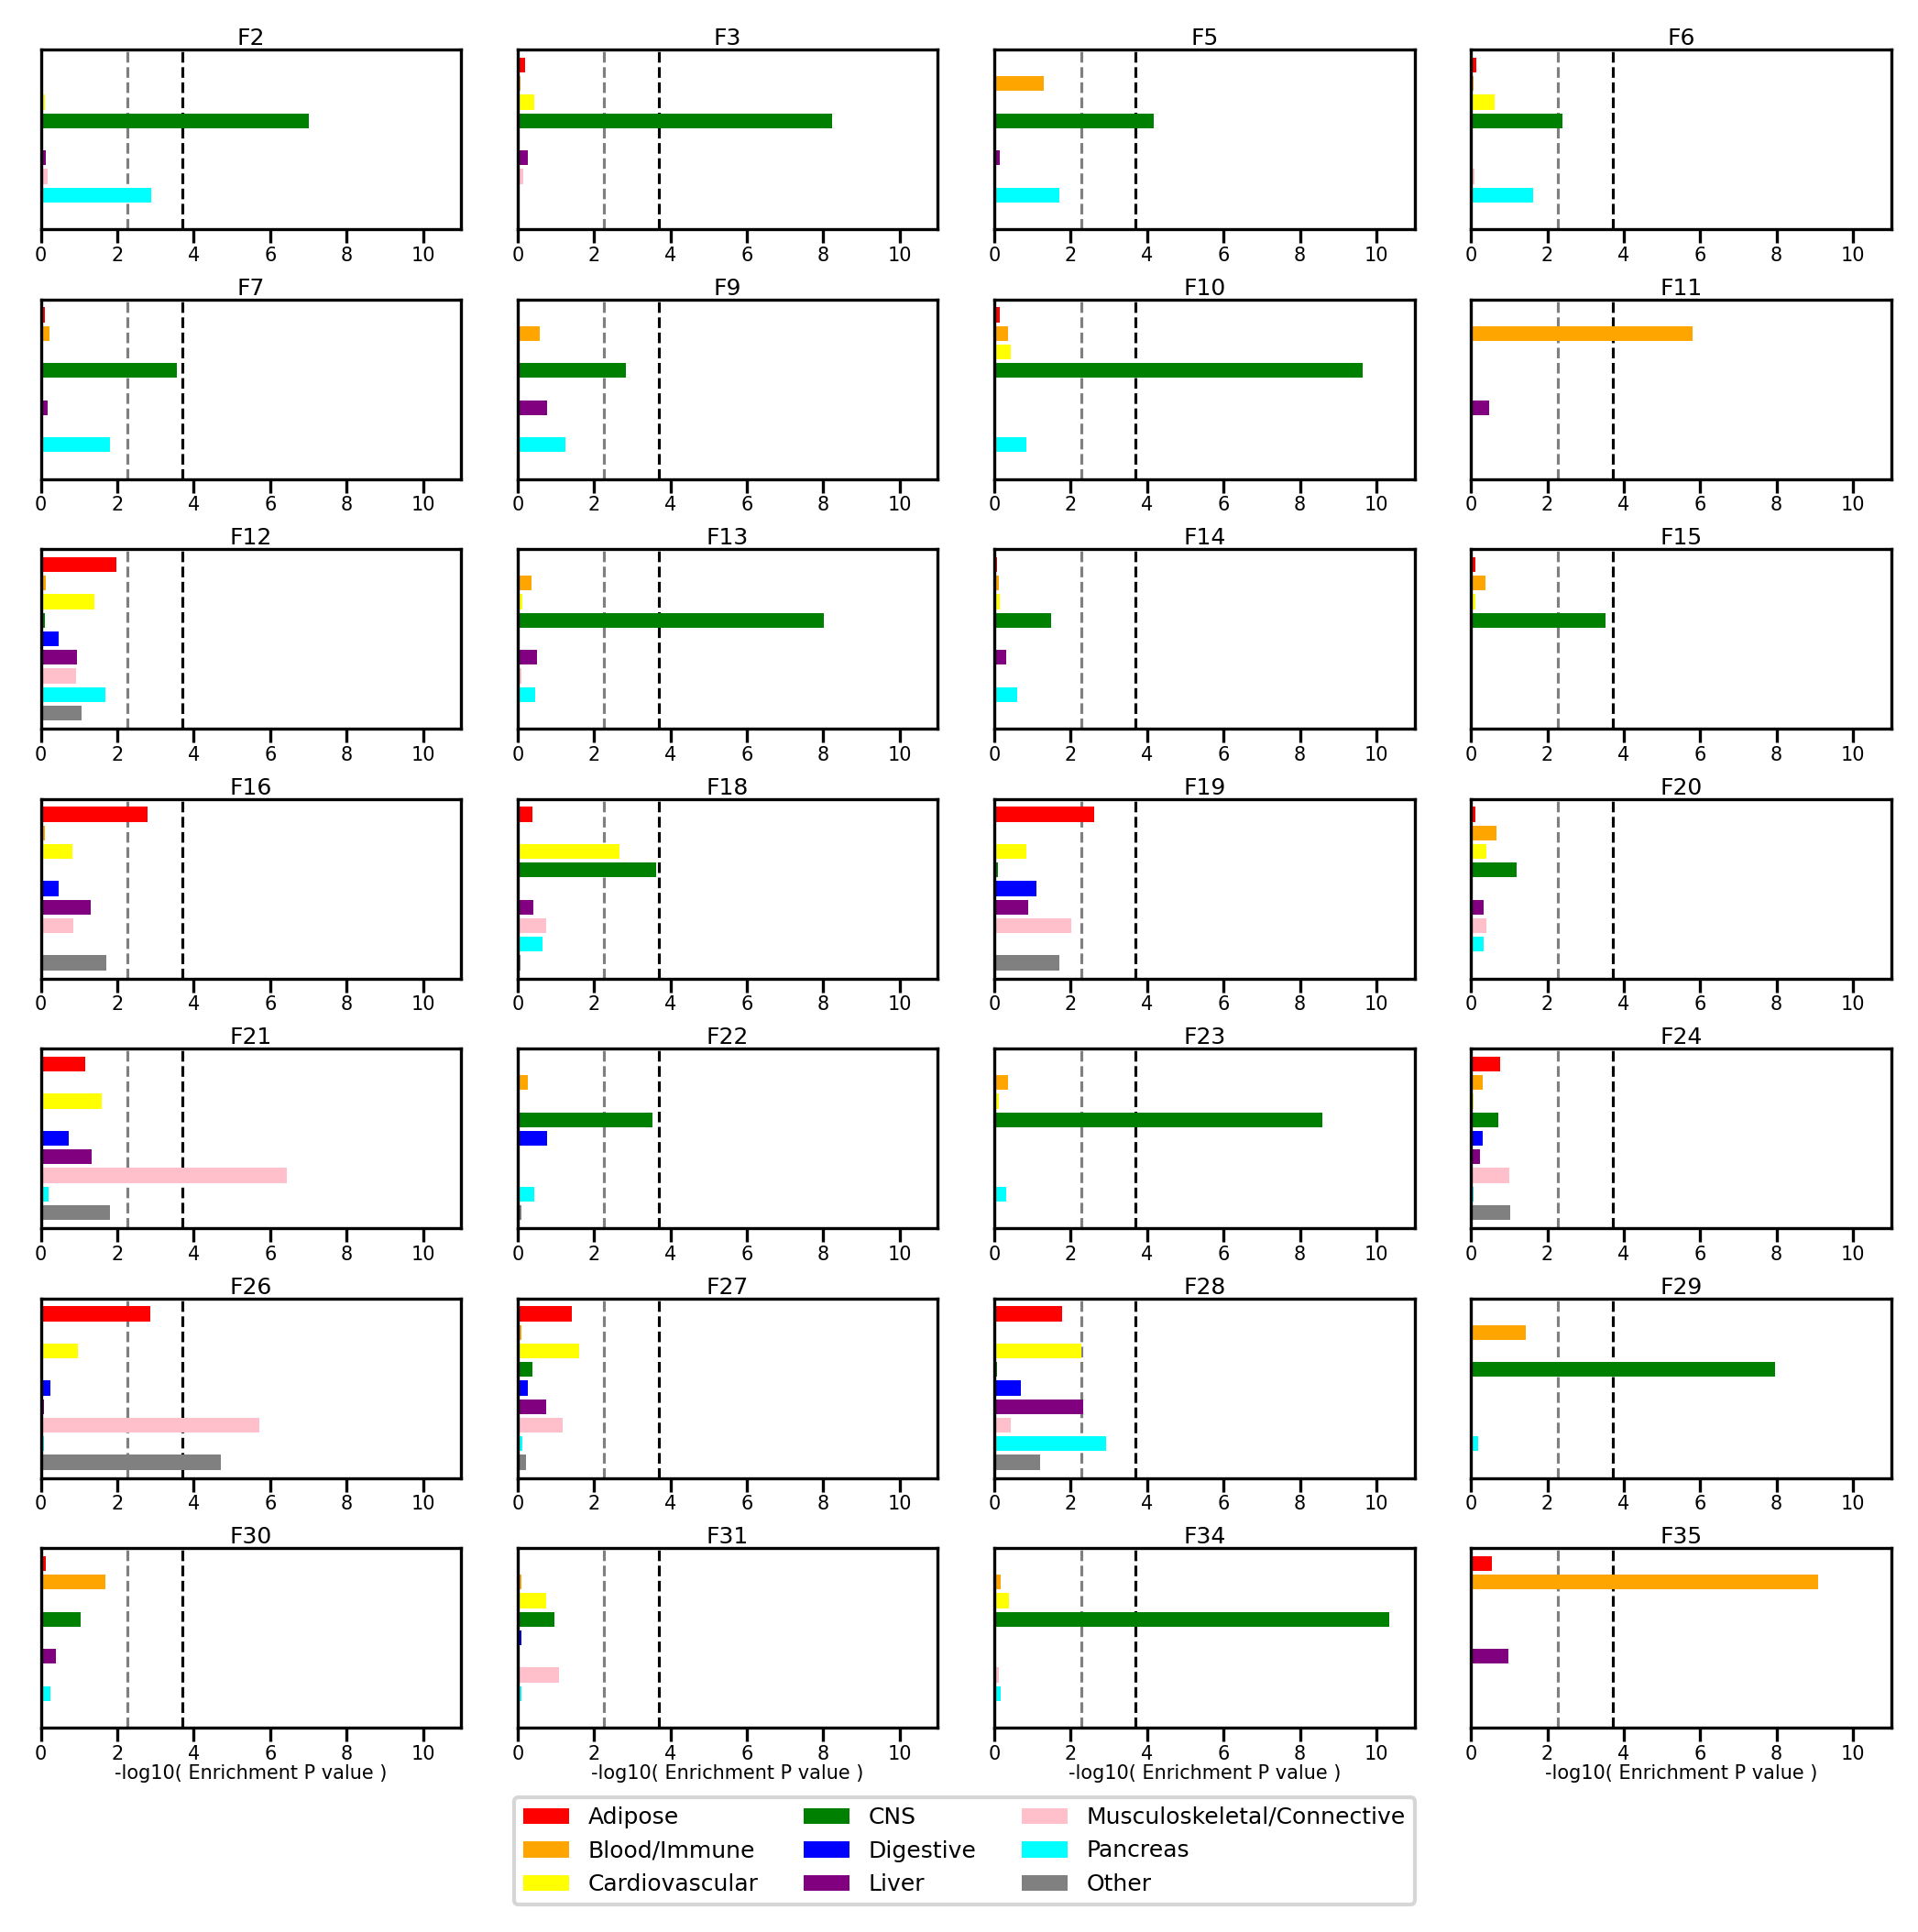

In [19]:
fig, axes = plt.subplots(8, 4, sharex=False, sharey=True, figsize=(7.086,7), gridspec_kw={'height_ratios':[1,1,1,1,1,1,1,0.4]},dpi=300)
#plt.figure(figsize=(16,5))
for i,factor in enumerate(sorted(usefac,key=lambda e: int(e[1:]))):
    temp = pd.read_table("/stanley/robinson/ccarey/UKBB/factor_gwas/factor_analysis/cfa/FINAL_CFA/FACTOR_SCORES/core/wls_gwas/FINAL/outputs/preprocessed/h2_"+factor+"_chromatingroups.cell_type_results.txt")
    temp["-log10(p)"] = temp.apply(lambda x: -1*np.log10(x["Coefficient_P_value"]),axis=1)
    temp = temp.set_index("Name")
    temp = temp.loc[orderedcats]
    mymax = np.max([temp["-log10(p)"].max()+0.5,bonf])
    axes[math.floor(i / 4),i % 4].axvline(x=bonf,color="k",alpha=1,ls="--",zorder=0, lw=0.75)
    axes[math.floor(i / 4),i % 4].axvline(x=fdr,color="k",alpha=0.5,ls="--",zorder=0, lw=0.75)
    h = axes[math.floor(i / 4),i % 4].barh(range(9),temp["-log10(p)"][::-1],color=mycolors[::-1])
    axes[math.floor(i / 4),i % 4].set_title(factor.upper(), pad=-0.25)
    axes[math.floor(i / 4),i % 4].title.set_size(6)
    axes[math.floor(i / 4),i % 4].set_xlim([0,11])
    axes[math.floor(i / 4),i % 4].get_yaxis().set_visible(False)
    axes[math.floor(i / 4),i % 4].tick_params(axis='both', which='major', labelsize=5, pad=1)
    if(math.floor(i / 4) == 6):
        axes[math.floor(i / 4),i % 4].set_xlabel("-log10( Enrichment P value )", size=5, labelpad=0.25)

for j in range(0,4):
    axes[7,j].set_visible(False)
    
fig.legend(h[::-1],temp.index,bbox_to_anchor=(0.74,0.065),ncol=3,fontsize=6)
fig.tight_layout(h_pad=0.33) 
plt.savefig("/stanley/robinson/ccarey/factor_paper_revision/edfigs_CEC/EDFig6.eps") #,bbox_inches="tight")
# plt.show()